In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fakereal-logo-detection-dataset/file_mapping.csv
/kaggle/input/fakereal-logo-detection-dataset/Logos.txt
/kaggle/input/fakereal-logo-detection-dataset/output/Hp/000004.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Hp/000003.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Hp/000002.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Hp/000001.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Hp/000005.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Fila/000004.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Fila/000003.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Fila/000002.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Fila/000001.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Fila/000005.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Twitter/000004.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Twitter/000003.jpg
/kaggle/input/fakereal-logo-detection-dataset/output/Twit

In [5]:
import tensorflow as tf
from tensorflow. keras import models, layers 
import matplotlib.pyplot as plt
#Importing all the neccesary models

2024-07-16 06:41:38.259242: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 06:41:38.259402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 06:41:38.409493: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/fakereal-logo-detection-dataset/file_mapping.csv')

# Display the first few rows of the dataframe
print(df.head())


                         Filename   Brand Name    Label  \
0       output\Cowbell\000001.jpg      Cowbell  Genuine   
1  genLogoOutput\Rolex\000003.jpg        Rolex     Fake   
2   output\PlayStation\000005.jpg  PlayStation  Genuine   
3       output\YouTube\000004.jpg      YouTube  Genuine   
4   genLogoOutput\Lays\000004.jpg         Lays     Fake   

                                             Tagline  
0                            sooo creamy sooo gooood  
1  antiophthalmic_factor crown for every accompli...  
2                                        eNoS Lives.  
3                                 Broadcast Yourself  
4                               eNoS sprightliness .  


In [8]:
df.drop(columns=['Tagline'])#No need for Taglines for prediction

Filename   Brand Name    Label
0                 output\Cowbell\000001.jpg      Cowbell  Genuine
1            genLogoOutput\Rolex\000003.jpg        Rolex     Fake
2             output\PlayStation\000005.jpg  PlayStation  Genuine
3                 output\YouTube\000004.jpg      YouTube  Genuine
4             genLogoOutput\Lays\000004.jpg         Lays     Fake
..                                      ...          ...      ...
820                output\Google\000002.jpg       Google  Genuine
821               output\Nescafe\000004.jpg      Nescafe  Genuine
822           genLogoOutput\Lays\000003.jpg         Lays     Fake
823  genLogoOutput\Gillette\scal_000002.jpg     Gillette     Fake
824  genLogoOutput\Gillette\scal_000003.jpg     Gillette     Fake

[825 rows x 3 columns]

In [76]:
# Check for empty values
empty_values = df.isnull().sum()

print("Empty values in each column:")
print(empty_values)
#No empty values detected

Empty values in each column:
Filename          0
Brand Name        0
Label             0
Tagline          12
adjusted_path     0
dtype: int64


In [9]:
# Count unique values in the 'Label' column
label_counts = df['Label'].value_counts()

# Display the counts
print("\nUnique values in the 'Label' column and their counts:")
print(label_counts)



Unique values in the 'Label' column and their counts:
Label
Fake       550
Genuine    275
Name: count, dtype: int64


In [10]:
# Map labels
df['Label'] = df['Label'].map({'Genuine': 1, 'Fake': 0})

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)


Shuftling ensured that the data rows are randomized to avoid any inherent ordering that could bias the learning process

In [11]:
base_path = '/kaggle/input/fakereal-logo-detection-dataset/'
def adjust_path(path, base_path):
    normalize = path.replace('\\', '/')
    return os.path.join(base_path, normalize.lstrip('/'))

df['adjusted_path'] = df['Filename'].apply(lambda x: adjust_path(x, base_path))
image_paths = df['adjusted_path'].values
labels = df['Label'].values
df.head()
#This allowed me to simplfy the multiple folders access in the dataset

Filename   Brand Name  Label  \
0             output\Microsoft\000003.jpg    Microsoft      1   
1       genLogoOutput\Gillette\000002.jpg     Gillette      0   
2  genLogoOutput\McDonald\scal_000002.jpg     McDonald      0   
3                  output\Lays\000004.jpg         Lays      1   
4           output\Burger King\000005.jpg  Burger King      1   

                                            Tagline  \
0                         Making it all make sense.   
1      The dependable vitamin_A valet toilet grow .   
2  iodin ’ chiliad Lovin ’ information_technology .   
3                                       eNoS Lives.   
4                                 Have it your way.   

                                       adjusted_path  
0  /kaggle/input/fakereal-logo-detection-dataset/...  
1  /kaggle/input/fakereal-logo-detection-dataset/...  
2  /kaggle/input/fakereal-logo-detection-dataset/...  
3  /kaggle/input/fakereal-logo-detection-dataset/...  
4  /kaggle/input/fakereal-logo-detection-dataset/...

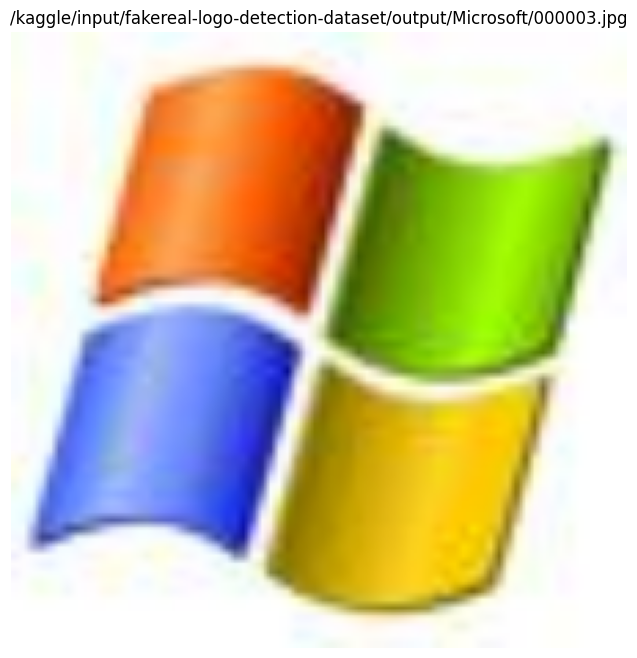

In [13]:
# Function to load and display an image
def load_and_display_image(image_path):
    # Load image using TensorFlow
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Adjust channels as needed
    img = tf.image.resize(img, [224, 224])  # Resize image if necessary
    img = img.numpy()  # Convert TensorFlow tensor to NumPy array for Matplotlib
#using matlab to display.
    plt.figure(figsize=(8, 8))
    
    plt.imshow(img.astype("uint8"))#converting for proper display
    plt.title(image_path)#show path where u got it from
    plt.axis('off')
    plt.show()

# Example: Load and display the first image from the DataFrame
image_path = df['adjusted_path'].iloc[0]
load_and_display_image(image_path)

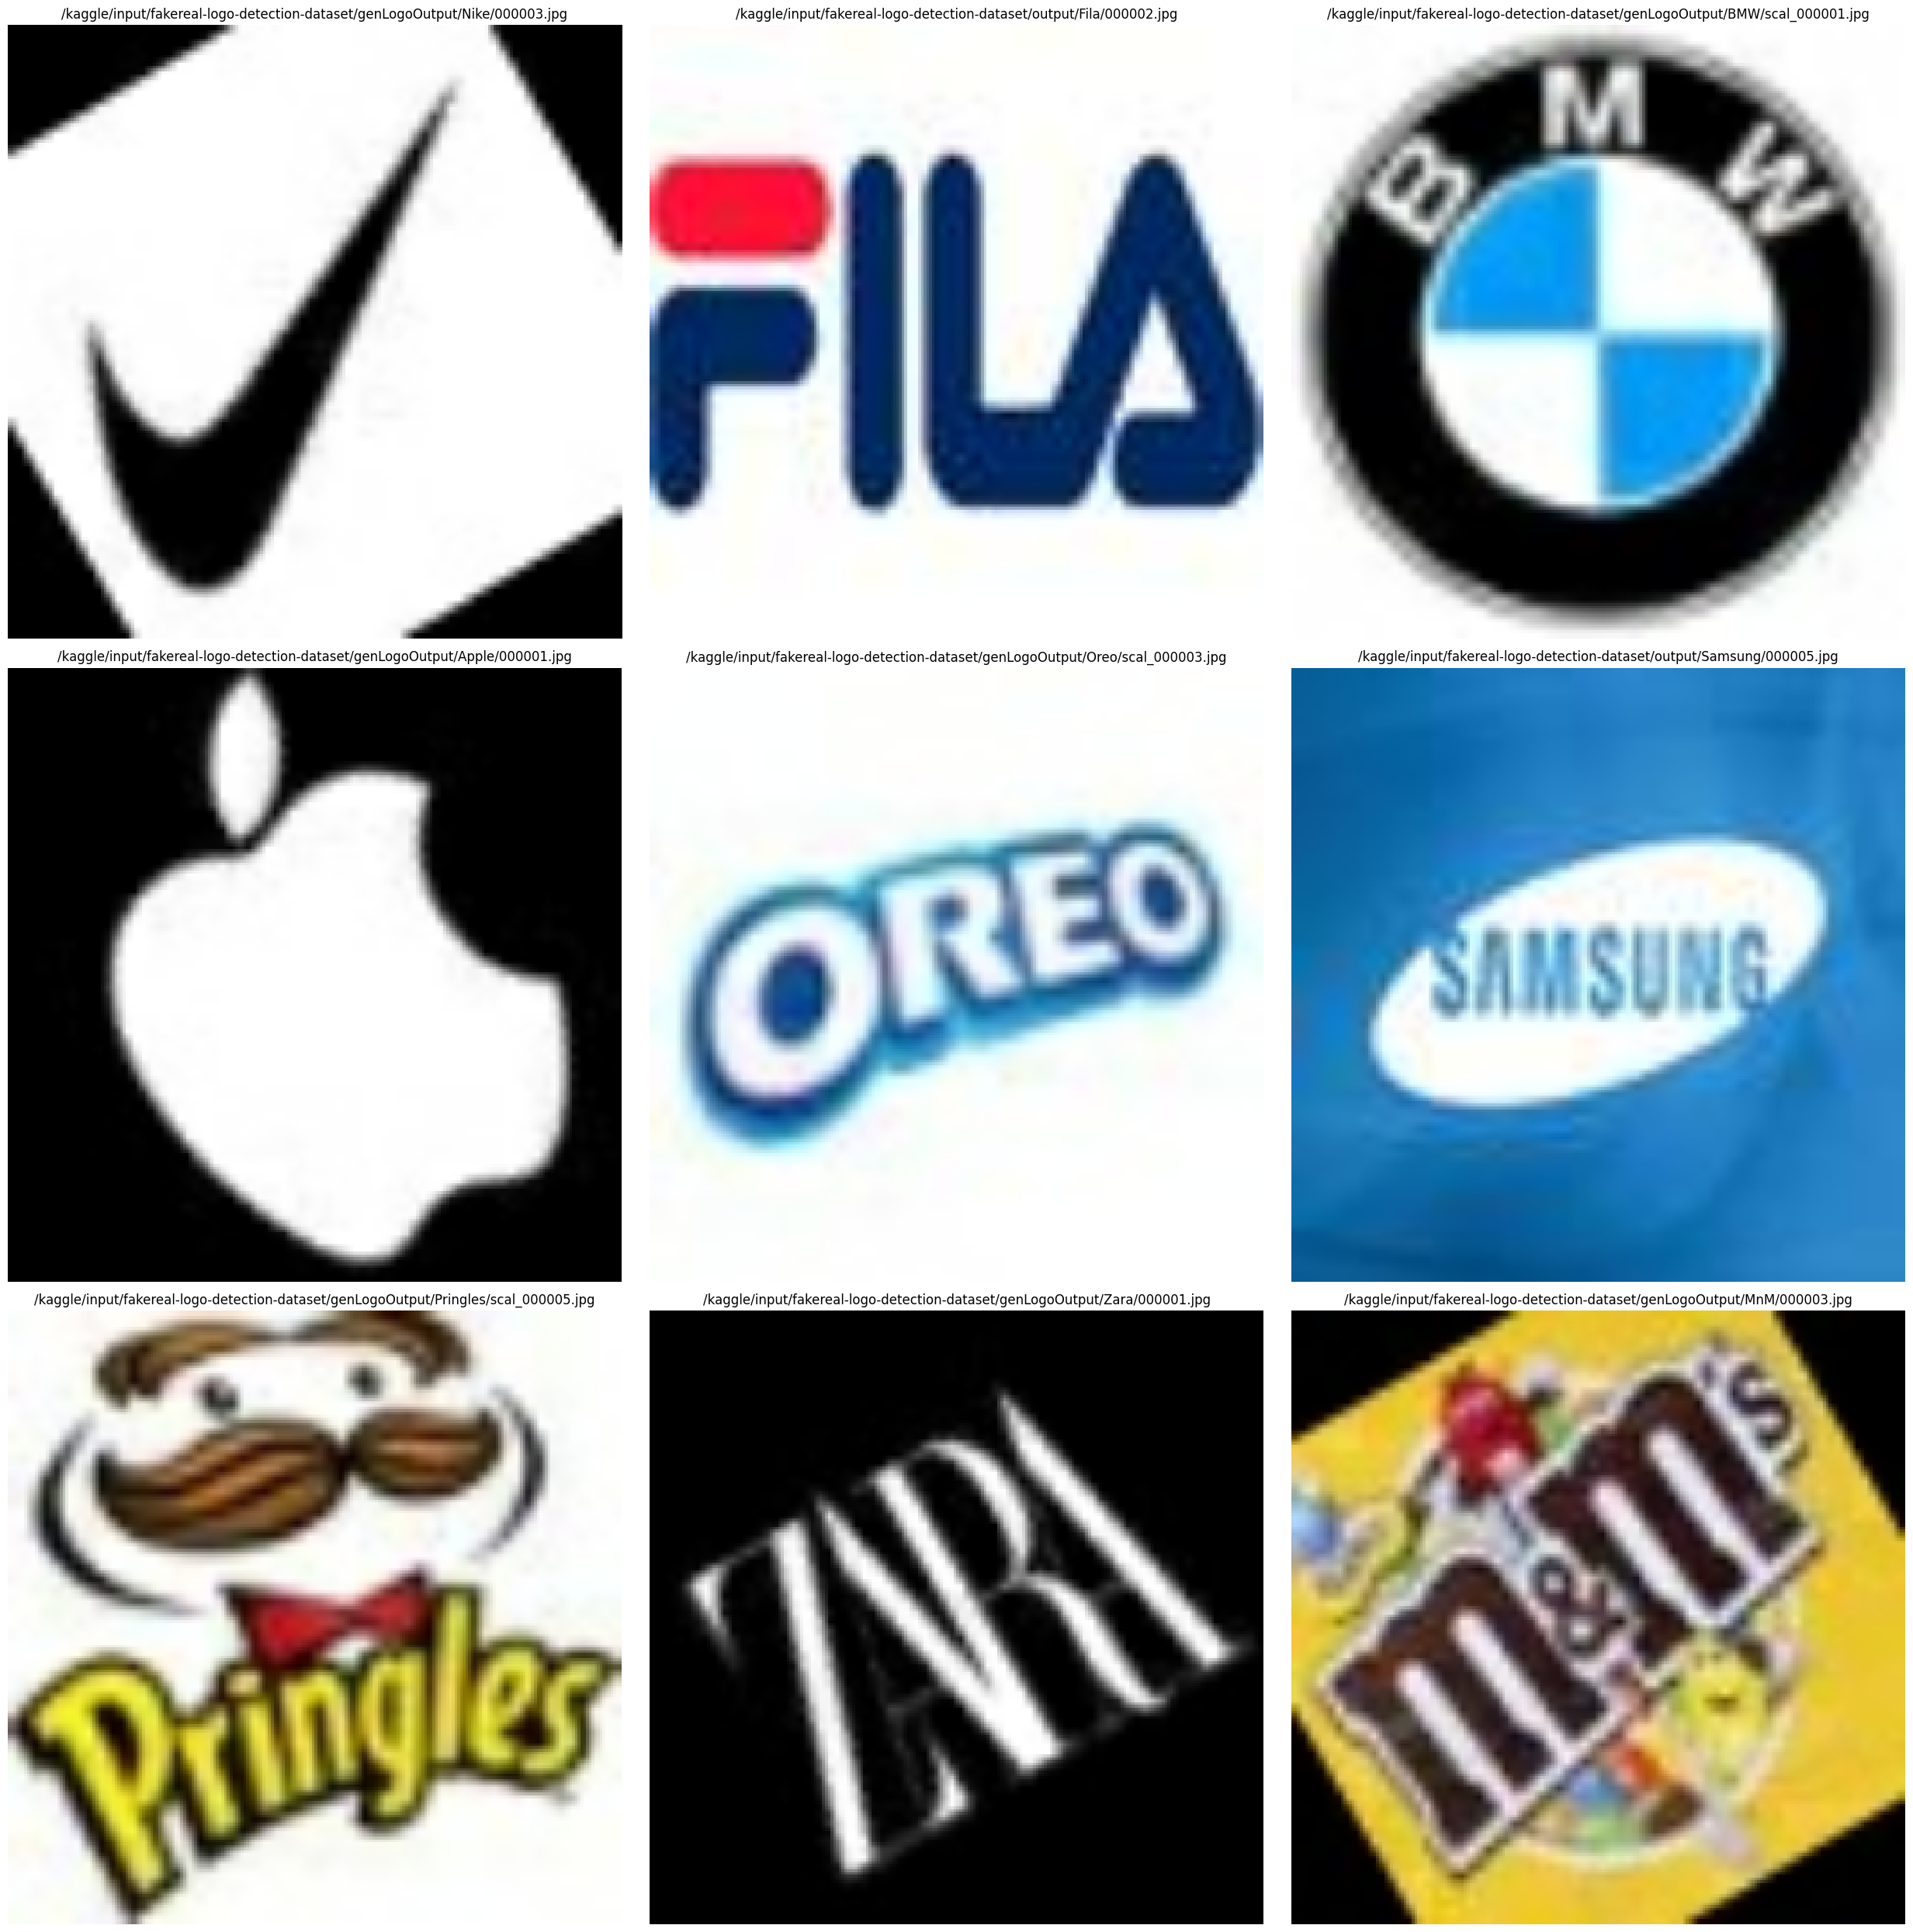

In [14]:
# Function to load and display multiple images
def load_and_display_images(image_paths):
    plt.figure(figsize=(25, 25))#change dimension according so label name also come
    num_images = len(image_paths)
    rows = 3  # Number of rows in the grid
    cols = 3  # Number of columns in the grid

    # Randomly select 9 images if there are more than 9 images in path
    if num_images > 9:
        image_paths = np.random.choice(image_paths, size=9, replace=False)

    for i, image_path in enumerate(image_paths):
        # Load image using TensorFlow
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [224, 224])
        img = img.numpy()

        # Display image using Matplotlib
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img.astype("uint8"))
        plt.title(image_path)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load all adjusted image paths from the DataFrame
image_paths = df['adjusted_path'].tolist()

# Display 12 random images
load_and_display_images(image_paths)

refer to https://www.kaggle.com/discussions/general/386567# to convert into streamlit
#80% ==> training
20% ==> 10% validationi, 10% test


In [20]:

from sklearn.model_selection import train_test_split

# Split into 80% for training and 20% for testing
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=10,shuffle=True)

# Split the 20% test set equally into test and validation sets
val_paths, test_paths, val_labels, test_labels = train_test_split(
    test_paths, test_labels, test_size=0.5, random_state=10,shuffle=True)


In [54]:
#Alternate spliting- using Tensor flow
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = ds.cardinality().numpy()
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

Better to use the tensor flow approach here as more optimized for the following data pipeline and allows for caching, prefetching, and parallel data loading.

In [55]:
size=tuple((224,224))
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  base_path,
  seed=123,
  image_size=size,
  batch_size=32
)#Ensure the image size and batch size stay the same when loaded into model to avoid running into errors


train_dataset,val_dataset,test_dataset = get_dataset_partitions_tf(dataset)

Found 825 files belonging to 2 classes.


In [56]:
# Cache, shuffle, and prefetch the datasets - OPtomised for training
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

The above helped optomise and speed up the training process used below as 
1.Cache to ensure that the data is loaded only once and so speeding up subsequent epochs.
2.Shuffle to provide randomising to the data to  prevent overfitting and improve generalisation.
3.Prefetch for the pipeline- ensure that the model always has data to process without waiting.

In [59]:
# Define data augmentation and preprocessing layers
#created rotated constrasted so its able to predict 


resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(224, 224),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Define input shape
input_shape = (32,224, 224, 3)#3-RGB 32-batch size
n_classes = 2  #  binary classification (Fake or Genuine)

# Create the model
model = models.Sequential([
    
    resize_and_rescale,  # Preprocessing step
    data_augmentation,  # Data augmentation step
    layers.Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # First max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer
    layers.MaxPooling2D((2, 2)),  # Third max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Fourth convolutional layer
    layers.MaxPooling2D((2, 2)),  # Fourth max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Fifth convolutional layer
    layers.MaxPooling2D((2, 2)),  # Fifth max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Sixth convolutional layer
    layers.MaxPooling2D((2, 2)),  # Sixth max pooling layer
    layers.Flatten(),  # Flatten layer to convert 2D feature maps to 1D feature vectors
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(n_classes, activation='softmax')  # Output layer for classification
])
model.build(input_shape=input_shape)
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)      │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (32, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (32, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (32, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (32, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (32, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (32, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,394 (669.51 KB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



In [61]:
#Network Train
history = model.fit(
    train_dataset,
    batch_size=32,
    validation_data=val_dataset,
    verbose=1,
    epochs=52,
)

Epoch 1/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6454 - loss: 0.6703 - val_accuracy: 0.6406 - val_loss: 0.6838
Epoch 2/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6544 - loss: 0.6726 - val_accuracy: 0.6406 - val_loss: 0.6569
Epoch 3/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6377 - loss: 0.6589 - val_accuracy: 0.6406 - val_loss: 0.6665
Epoch 4/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6769 - loss: 0.6331 - val_accuracy: 0.6406 - val_loss: 0.6550
Epoch 5/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6491 - loss: 0.6496 - val_accuracy: 0.6406 - val_loss: 0.6555
Epoch 6/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6657 - loss: 0.6284 - val_accuracy: 0.7031 - val_loss: 0.6551
Epoch 7/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6904 - loss: 0.6142 - val_accuracy: 0.7031 - val_loss: 0.5566
Epoch 8/52
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7030 - loss: 0.5727 - val_accuracy: 0.7188 - val_loss:

In [ ]:
#Now training is done : D -> Testing. I thunk able to get a good prediction around 31 epoch as well

In [62]:
scores=model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 397ms/step - accuracy: 0.9417 - loss: 0.1751


We are getting an accuracy of 94.17%

In [63]:
history

In [64]:
history.params

{'verbose': 1, 'epochs': 52, 'steps': 20}

In [65]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [66]:
history.history['accuracy']

[0.6546875238418579,
 0.6546875238418579,
 0.6546875238418579,
 0.6546875238418579,
 0.6546875238418579,
 0.6578124761581421,
 0.6734374761581421,
 0.653124988079071,
 0.7046874761581421,
 0.7578125,
 0.754687488079071,
 0.8125,
 0.831250011920929,
 0.8531249761581421,
 0.809374988079071,
 0.8343750238418579,
 0.8109375238418579,
 0.84375,
 0.8671875,
 0.8687499761581421,
 0.879687488079071,
 0.8734375238418579,
 0.8890625238418579,
 0.8687499761581421,
 0.870312511920929,
 0.8921874761581421,
 0.8765624761581421,
 0.879687488079071,
 0.8999999761581421,
 0.90625,
 0.8999999761581421,
 0.909375011920929,
 0.893750011920929,
 0.901562511920929,
 0.9156249761581421,
 0.862500011920929,
 0.9046875238418579,
 0.918749988079071,
 0.9234374761581421,
 0.917187511920929,
 0.9156249761581421,
 0.9125000238418579,
 0.9156249761581421,
 0.934374988079071,
 0.934374988079071,
 0.926562488079071,
 0.9156249761581421,
 0.910937488079071,
 0.9156249761581421,
 0.940625011920929,
 0.9359375238418579,

Text(0.5, 1.0, 'Traning + validation Loss')

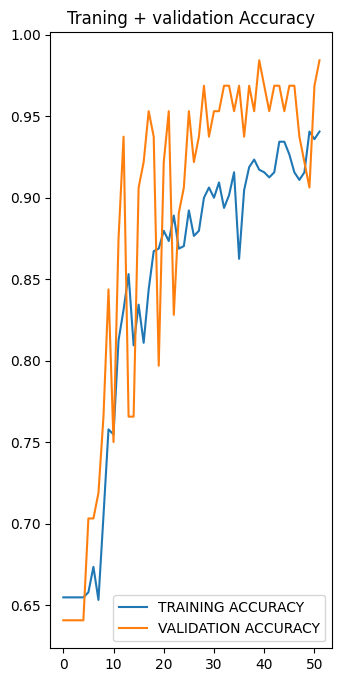

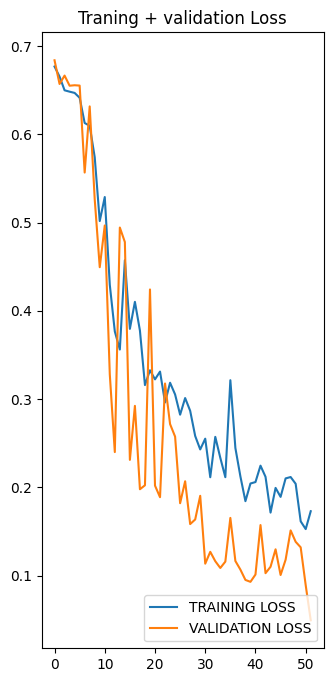

In [70]:
acc=history.history['accuracy']
valacc=history.history['val_accuracy']
loss=history.history['loss']
valoss=history.history['val_loss']
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)#52 so all epocs included
plt.plot(range(52),acc,label='TRAINING ACCURACY')
plt.plot(range(52),valacc,label='VALIDATION ACCURACY')
plt.legend(loc='lower right')
plt.title('Traning + validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)#52 so all epocs included
plt.plot(range(52),loss,label='TRAINING LOSS')
plt.plot(range(52),valoss,label='VALIDATION LOSS')
plt.legend(loc='lower right')
plt.title('Traning + validation Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


ValueError: num must be an integer with 1 <= num <= 25, not 26

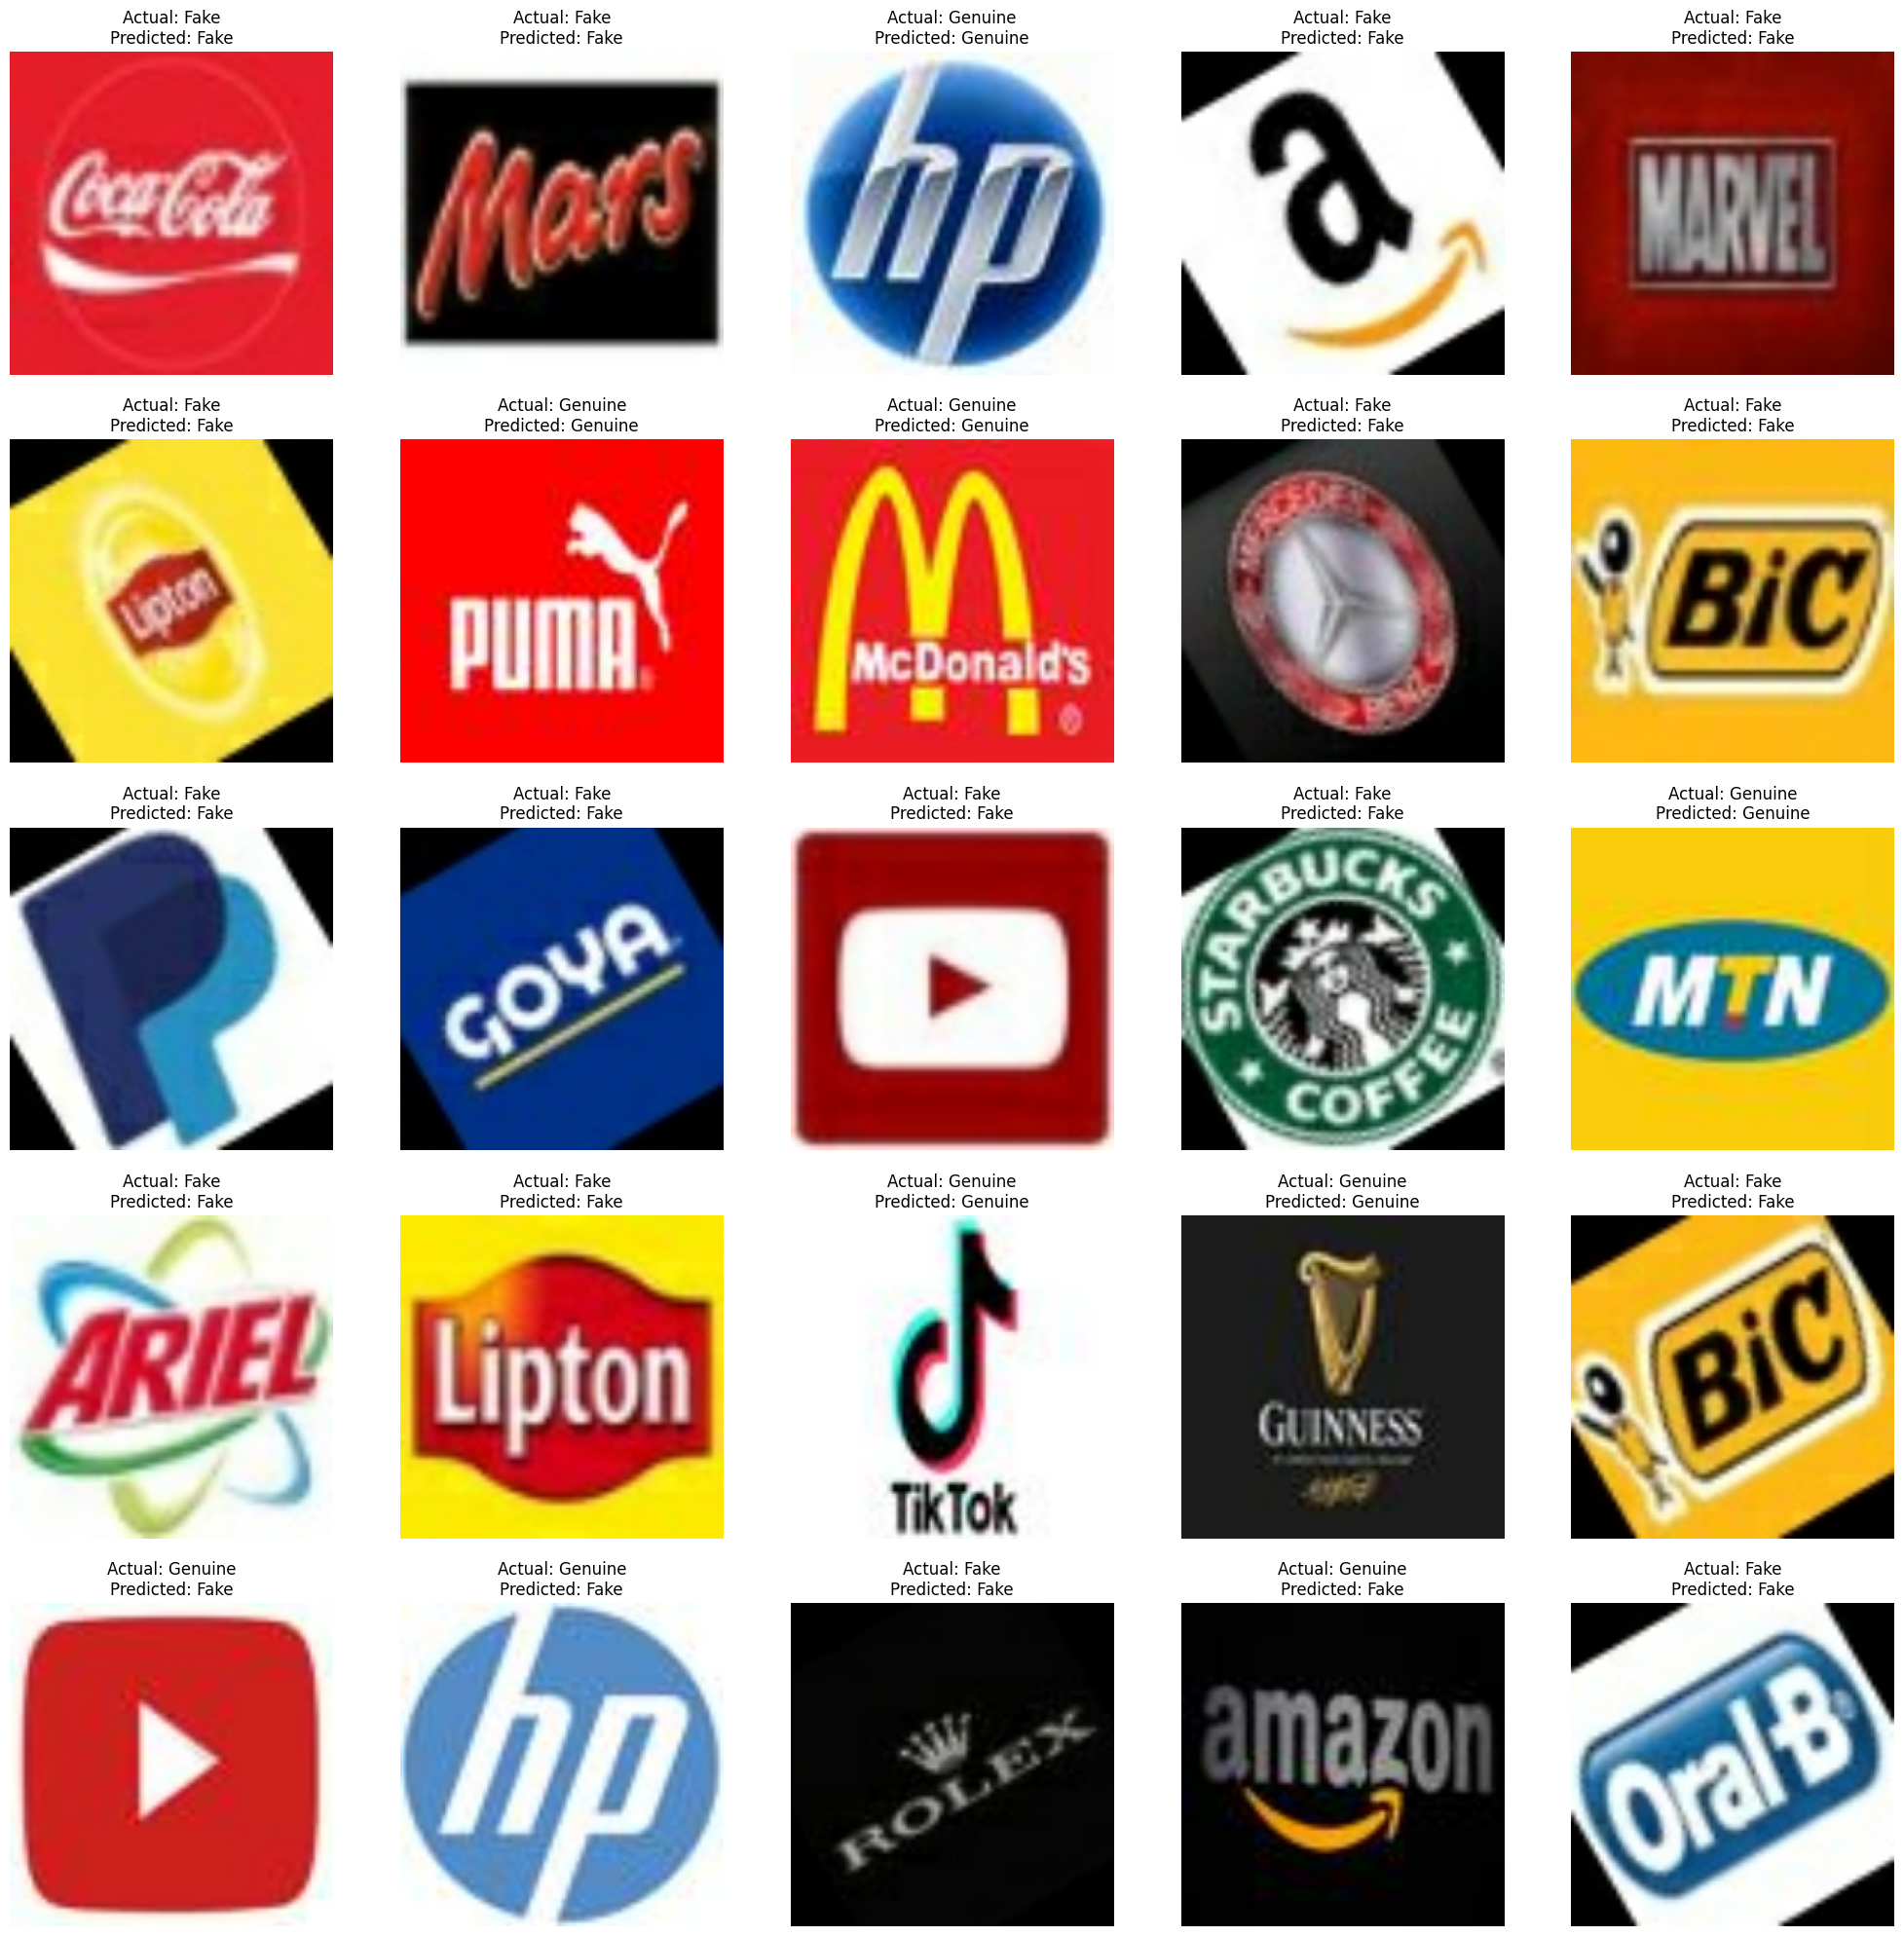

In [73]:

def get_class_name(label):
    return "Fake" if label == 0 else "Genuine"

# Iterate through the test dataset and make predictions
for images, labels in test_dataset:
    # Make predictions
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)
    
    # Display images with actual and predicted labels
    plt.figure(figsize=(25, 25))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual: {get_class_name(labels[i].numpy())}\nPredicted: {get_class_name(predicted_labels[i].numpy())}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    
    # Break the loop after displaying one batch 
    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


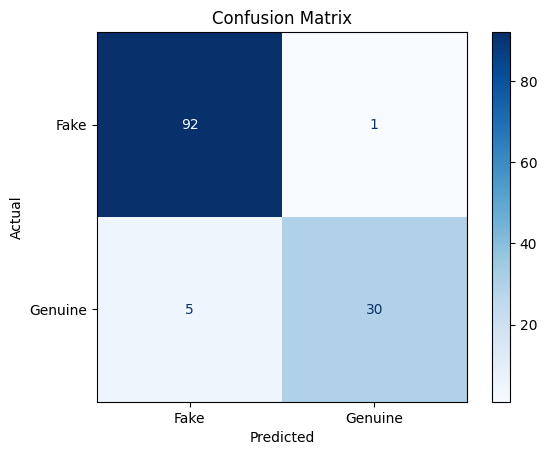

False Negatives: 5
False Positives: 1


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Function to plot confusion matrix with annotations
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset and make predictions
for images, labels in test_dataset:
    # Make predictions
    predictions = model.predict(images)
    predicted_labels.extend(tf.argmax(predictions, axis=1).numpy())
    true_labels.extend(labels.numpy())

# Convert lists to numpy arrays for computing confusion matrix
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

class_names = ["Fake", "Genuine"]

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, class_names)

# Calculate False Positives and False Negatives
cm = confusion_matrix(true_labels, predicted_labels)
false_negatives = cm[1][0]  # Genuine (1) incorrectly predicted as Fake (0)
false_positives = cm[0][1]  # Fake (0) incorrectly predicted as Genuine (1)

print(f"False Negatives: {false_negatives}")
print(f"False Positives: {false_positives}")
